# 🔍 Step 3: Customer Segmentation – PCA + Clustering
This notebook uses PCA to reduce dimensionality and applies KMeans and GMM to identify customer segments.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
sns.set(style='whitegrid')

In [25]:
# Load behavior scores
df = pd.read_csv('customer_behaviour_scores.csv')
features = df.drop(columns=['Customer ID'])

## 📉 PCA Reduction (2D)

In [26]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(features)
df['PCA1'] = pca_data[:,0]
df['PCA2'] = pca_data[:,1]
explained_var = pca.explained_variance_ratio_
print(f'Explained variance: {explained_var.sum():.2%}')

Explained variance: 91.40%


## 🚀 Run KMeans and Evaluate

In [27]:
scores = []
for k in range(4, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_data)
    sil = silhouette_score(pca_data, labels)
    db = davies_bouldin_score(pca_data, labels)
    scores.append((k, sil, db))
    print(f'K={k}: Silhouette={sil:.3f}, DBI={db:.3f}')

K=4: Silhouette=0.383, DBI=0.857
K=5: Silhouette=0.362, DBI=0.869
K=6: Silhouette=0.368, DBI=0.840
K=7: Silhouette=0.364, DBI=0.820
K=8: Silhouette=0.359, DBI=0.825


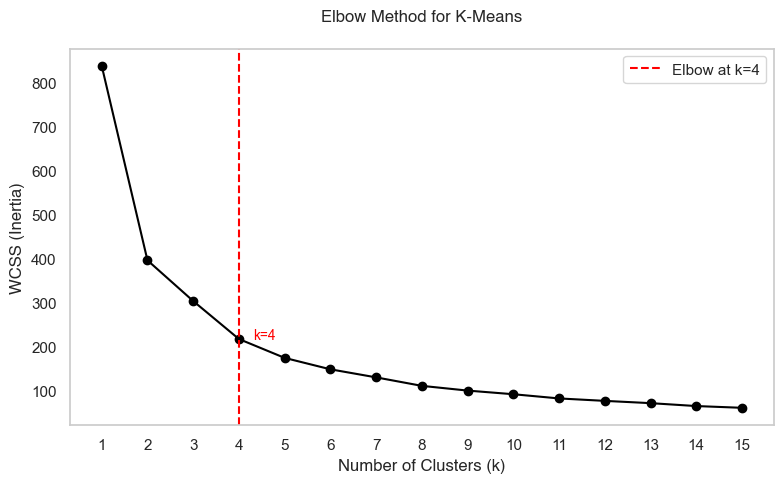

In [28]:

# Compute WCSS for k = 1 to 15
wcss = []
K_range = range(1, 16)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)  # Ensure pca_data is defined before running this
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve without grid
fig, ax = plt.subplots(figsize=(8, 5), facecolor='white')
ax.set_facecolor('white')

ax.plot(K_range, wcss, marker='o', color='black')
ax.axvline(x=4, color='red', linestyle='--', label='Elbow at k=4')
ax.text(4.3, wcss[3], 'k=4', color='red', fontsize=10)

ax.set_title('Elbow Method for K-Means', fontsize=12, family='Helvetica', pad=20)
ax.set_xlabel('Number of Clusters (k)', fontsize=12, family='Helvetica')
ax.set_ylabel('WCSS (Inertia)', fontsize=12, family='Helvetica')
ax.set_xticks(K_range)
ax.legend()

# Remove grid
ax.grid(False)

plt.tight_layout()
plt.show()

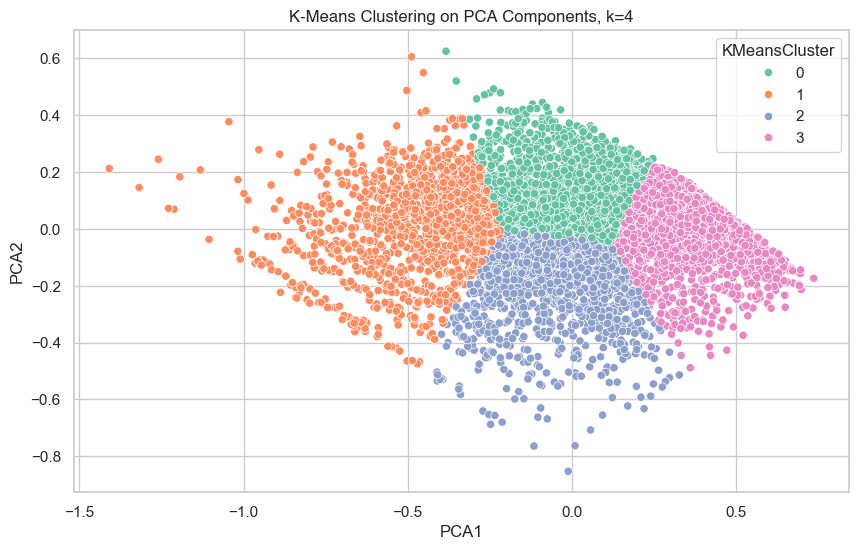

In [32]:
# Choose best K (e.g., 4) and plot
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['KMeansCluster'] = kmeans.fit_predict(pca_data)

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='KMeansCluster', palette='Set2')
plt.title('K-Means Clustering on PCA Components, k=4', fontsize=12, family='Helvetica')
plt.show()

## 🔁 Optional: Gaussian Mixture Clustering

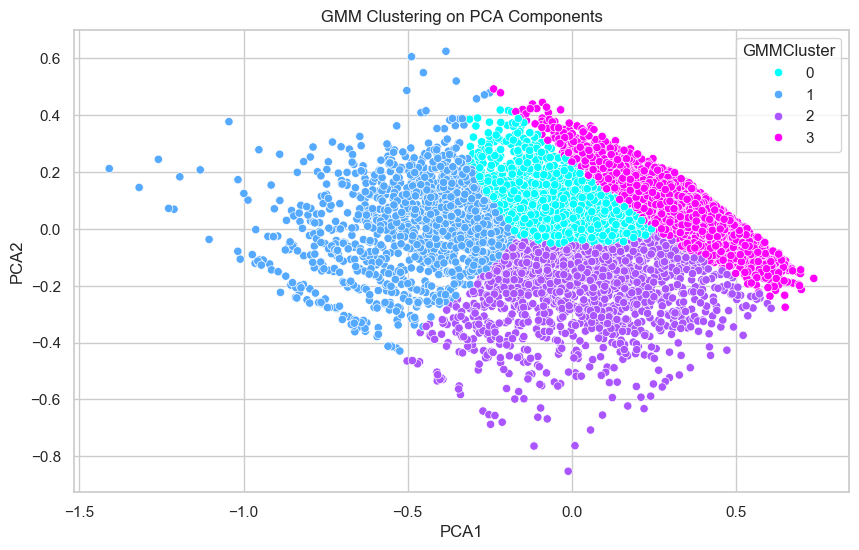

In [30]:
gmm = GaussianMixture(n_components=best_k, random_state=42)
df['GMMCluster'] = gmm.fit_predict(pca_data)

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='GMMCluster', palette='cool')
plt.title('GMM Clustering on PCA Components', fontsize=12, family='Helvetica')
plt.show()